In [129]:
# This notebook is the Kaggle Titanc problem: https://www.kaggle.com/c/titanic/data
import os
import pandas as pd

DATASET_PATH = "datasets/Titanic"
DATASET_NAME = "test.csv"
DATASET_URL = DATASET_PATH + DATASET_NAME

def fetch_data(dataset_url=DATASET_URL, dataset_path=DATASET_PATH):
    if not os.path.isdir(dataset_path):
        os.makedirs(dataset_path)

test_dataset = fetch_data()

def load_data(dataset_path=DATASET_PATH, dataset_name=DATASET_NAME):
    csv_path = os.path.join(dataset_path, dataset_name)
    return pd.read_csv(csv_path)

test_dataset = load_data()
test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [130]:
DATASET_PATH = "datasets/Titanic"
DATASET_NAME = "train.csv"
DATASET_URL = DATASET_PATH + DATASET_NAME

def fetch_data(dataset_url=DATASET_URL, dataset_path=DATASET_PATH):
    if not os.path.isdir(dataset_path):
        os.makedirs(dataset_path)

train_dataset = fetch_data()

def load_data(dataset_path=DATASET_PATH, dataset_name=DATASET_NAME):
    csv_path = os.path.join(dataset_path, dataset_name)
    return pd.read_csv(csv_path)

train_dataset = load_data()
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


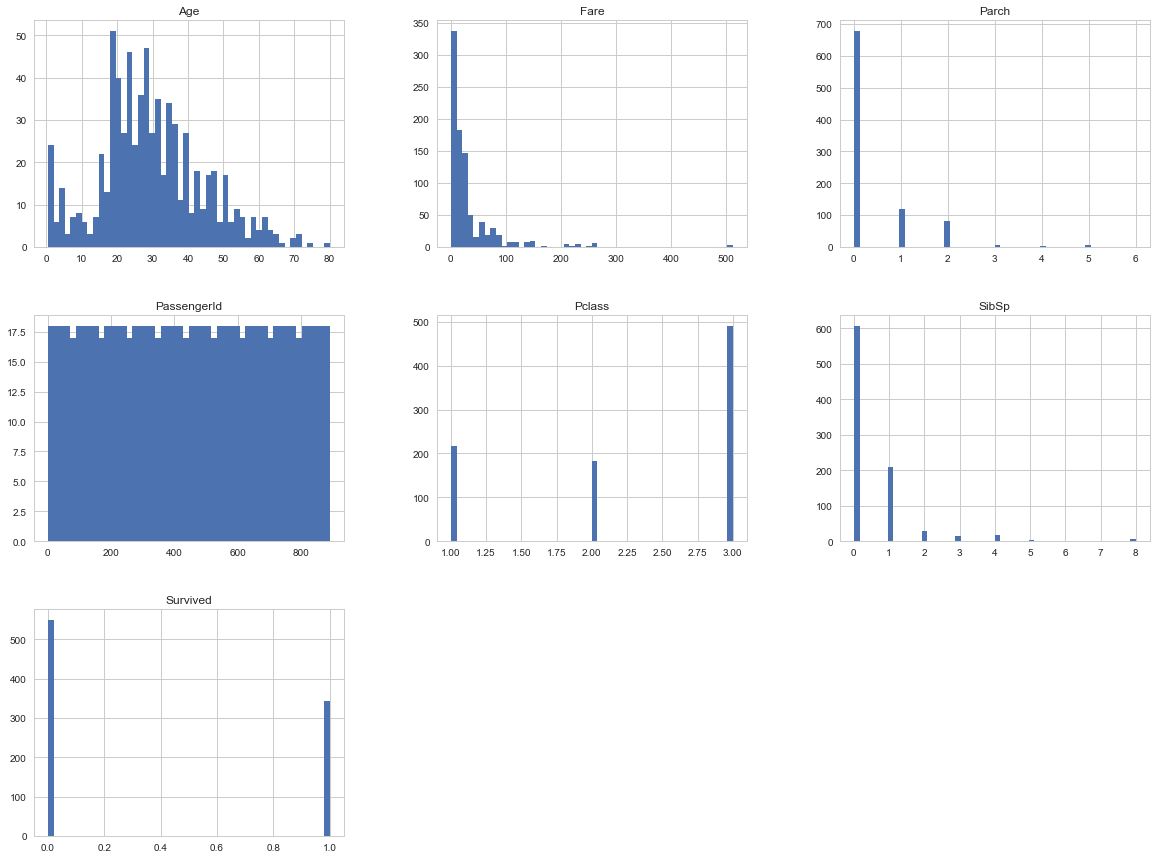

In [131]:
# View the Data
import matplotlib.pyplot as plt
train_dataset.hist(bins=50, figsize=(20, 15))
plt.show()

In [132]:
train_dataset.info()
print("----------------------------")
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare

In [133]:
train_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [134]:
# Break out survival rates based on class & sex
# Based on the Titanic movie with Leo D. they first class passengers boarded the lifeboat first, 
# then women and children had priority! Not very scientific but seems logical that there would be a correlation.

fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65

ax1=fig.add_subplot(141)
female_highclass = train_dataset.Survived[train_dataset.Sex == 'female'][train_dataset.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = train_dataset.Survived[train_dataset.Sex == 'female'][train_dataset.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Survived","Died"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = train_dataset.Survived[train_dataset.Sex == 'male'][train_dataset.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = train_dataset.Survived[train_dataset.Sex == 'male'][train_dataset.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

plt.show()

In [135]:
# Get rid of name, ticket number, and cabin
X_train = train_dataset.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
X_test = test_dataset.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [136]:
# Find NA's
print(X_train['Embarked'].isnull().sum())
print(X_test['Embarked'].isnull().sum())

2
0


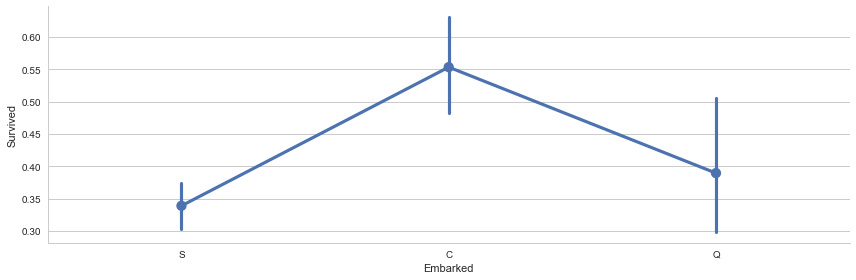

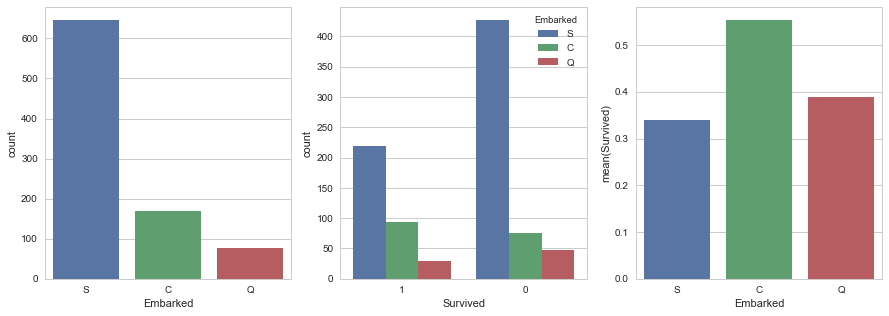

In [137]:
X_train['Embarked'] = X_train['Embarked'].fillna('S')

#Visualize the two
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

sns.factorplot('Embarked','Survived', data=X_train,size=4,aspect=3)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Embarked', data=X_train, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=X_train, order=[1,0], ax=axis2)

# group by embarked, and get the mean for survived passengers for each value in Embarked
embark_perc = X_train[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)

# I am going to drop embarked - it doesn't really seem to have an impact on survival
X_train.drop(['Embarked'], axis=1,inplace=True)
X_test.drop(['Embarked'], axis=1,inplace=True)

In [138]:
# Find NA's
print(X_train['Fare'].isnull().sum())
print(X_test['Fare'].isnull().sum())

0
1


In [139]:
# only for test_df, since there is a missing "Fare" values
X_test["Fare"].fillna(X_test["Fare"].median(), inplace=True)

In [140]:
# Find NA's
print(X_train['Age'].isnull().sum())
print(X_test['Age'].isnull().sum())

177
86


/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


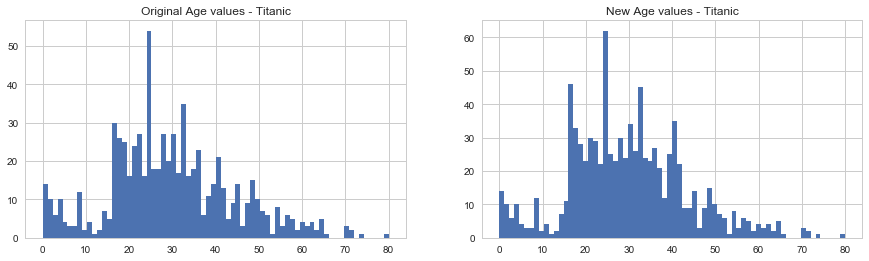

In [141]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

X_train['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# Started with just the median - it biased the data, so I am going to try a different approach
# Generate a random number between (mean-std) and (mean+std)
average_age   = X_train["Age"].mean()
std_age       = X_train["Age"].std()
count_nan_age_tr = X_train["Age"].isnull().sum()
count_nan_age_ts = X_test["Age"].isnull().sum()

rand_tr = np.random.randint(average_age - std_age, average_age + std_age, size = count_nan_age_tr)
rand_ts = np.random.randint(average_age - std_age, average_age + std_age, size = count_nan_age_ts)

X_train["Age"][np.isnan(X_train["Age"])] = rand_tr
X_test["Age"][np.isnan(X_test["Age"])] = rand_ts

X_train['Age'] = X_train['Age'].astype(int)
X_test['Age']  = X_test['Age'].astype(int)

X_train['Age'].hist(bins=70, ax=axis2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Child,Female
0,0,3,22,1,0,7.2500,0,0
1,1,1,38,1,0,71.2833,0,1
2,1,3,26,0,0,7.9250,0,1
3,1,1,35,1,0,53.1000,0,1
4,0,3,35,0,0,8.0500,0,0


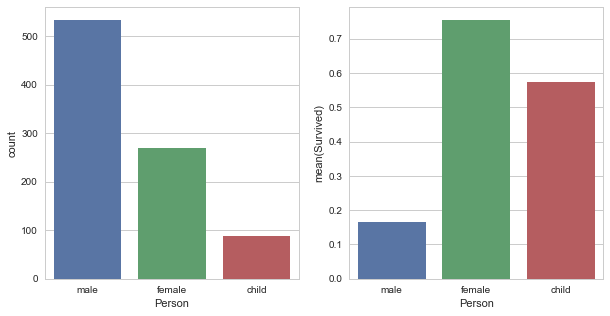

In [142]:
# Encode age
# Children(age < ~16) on aboard seem to have a high chances for Survival.
# So, we can classify passengers as males, females, and child
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex
    
X_train['Person'] = X_train[['Age','Sex']].apply(get_person,axis=1)
X_test['Person']  = X_test[['Age','Sex']].apply(get_person,axis=1)

# No need to use Sex column since we created Person column
X_train.drop(['Sex'],axis=1,inplace=True)
X_test.drop(['Sex'],axis=1,inplace=True)

# create dummy variables for Person column, & drop Male as it has the lowest average of survived passengers
person_dummies_train  = pd.get_dummies(X_train['Person'])
person_dummies_train.columns = ['Child','Female','Male']
person_dummies_train.drop(['Male'], axis=1, inplace=True)

person_dummies_test  = pd.get_dummies(X_test['Person'])
person_dummies_test.columns = ['Child','Female','Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

X_train = X_train.join(person_dummies_train)
X_test  = X_test.join(person_dummies_test)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

# sns.factorplot('Person',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Person', data=X_train, ax=axis1)

# average of survived for each Person(male, female, or child)
person_perc = X_train[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male','female','child'])

X_train.drop(['Person'],axis=1,inplace=True)
X_test.drop(['Person'],axis=1,inplace=True)

X_train.head()

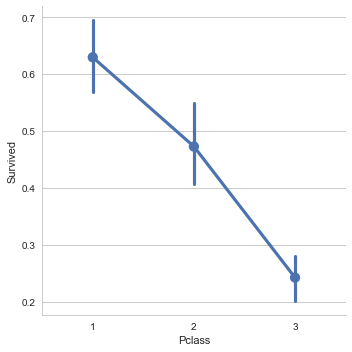

In [143]:
# Encode P-Class
# sns.factorplot('Pclass',data=titanic_df,kind='count',order=[1,2,3])
sns.factorplot('Pclass','Survived',order=[1,2,3], data=X_train,size=5)

# create dummy variables for Pclass column, & drop 3rd class as it has the lowest average of survived passengers
pclass_dummies_train  = pd.get_dummies(X_train['Pclass'])
pclass_dummies_train.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_train.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test  = pd.get_dummies(X_test['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

X_train.drop(['Pclass'],axis=1,inplace=True)
X_test.drop(['Pclass'],axis=1,inplace=True)

X_train = X_train.join(pclass_dummies_train)
X_test  = X_test.join(pclass_dummies_test)

In [144]:
# Define y_train
y_train = X_train['Survived']
X_train = X_train.drop('Survived', axis=1)

In [153]:
# Scale features and Create Kernel SVM Classifier
from sklearn.svm import SVC

svm_clf = SVC(kernel='rbf', random_state=0)
svm_clf.fit(X_train, y_train)

y_train_pred = cross_val_predict(svm_clf, X_train, y_train, cv=3)

#Check out precision, recall, and F1
print("Precision: %.2f" % precision_score(y_train, y_train_pred))
print('Recall: %.2f' % recall_score(y_train, y_train_pred))
print('F1 Score: %.2f' % f1_score(y_train, y_train_pred))

y_pred = svm_clf.predict(X_test)

acc_svm_clf = round(svm_clf.score(X_train, y_train) * 100, 2)
print(acc_svm_clf)

Precision: 0.61
Recall: 0.40
F1 Score: 0.48
86.2


In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

forest_clf = RandomForestClassifier(n_estimators=100, random_state=0)
forest_clf.fit(X_train, y_train)
y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)

#Check out precision, recall, and F1
print("Precision: %.2f" % precision_score(y_train, y_train_pred))
print('Recall: %.2f' % recall_score(y_train, y_train_pred))
print('F1 Score: %.2f' % f1_score(y_train, y_train_pred))

y_pred = forest_clf.predict(X_test)

acc_rf_clf = round(forest_clf.score(X_train, y_train) * 100, 2)
print(acc_rf_clf)

Precision: 0.72
Recall: 0.70
F1 Score: 0.71
97.87


In [149]:
output_df = pd.DataFrame({
    'PassengerId': test_dataset['PassengerId'],
    'Survived': y_pred_rf
})
output_df.to_csv('output/submission.csv', index=False)